In [1]:
# Import essential libraries
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import os
from PIL import Image
import pandas as pd

print("Libraries imported successfully!")
print("TensorFlow version:", tf.__version__)

Libraries imported successfully!
TensorFlow version: 2.20.0


In [5]:
# Define dataset path - UPDATE THIS PATH to your actual dataset location
dataset_path = "C:\project_6\Tumour"  # ⚠️ Change this path!

# Check if path exists
if os.path.exists(dataset_path):
    print("✅ Dataset path exists!")
    
    # List all classes (tumor types)
    classes = [d for d in os.listdir(dataset_path) if os.path.isdir(os.path.join(dataset_path, d))]
    print(f"📁 Found {len(classes)} classes: {classes}")
    
    # Count images per class
    print("\n📊 Image count per class:")
    for class_name in classes:
        class_path = os.path.join(dataset_path, class_name)
        images = [f for f in os.listdir(class_path) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]
        print(f"   {class_name}: {len(images)} images")
        
else:
    print("❌ Dataset path not found! Please update the 'dataset_path' variable.")
    print("Current working directory:", os.getcwd())
    print("Available directories:", os.listdir('.'))

✅ Dataset path exists!
📁 Found 3 classes: ['test', 'train', 'valid']

📊 Image count per class:
   test: 0 images
   train: 0 images
   valid: 0 images


In [7]:
# Let's check the actual structure
def explore_dataset_structure(base_path):
    print("🔍 Exploring dataset structure:")
    
    for item in os.listdir(base_path):
        item_path = os.path.join(base_path, item)
        if os.path.isdir(item_path):
            print(f"\n📁 {item}/")
            
            # Check subdirectories (classes)
            sub_items = os.listdir(item_path)
            for sub_item in sub_items:
                sub_path = os.path.join(item_path, sub_item)
                if os.path.isdir(sub_path):
                    # Count images in this class
                    images = [f for f in os.listdir(sub_path) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]
                    print(f"   └── {sub_item}: {len(images)} images")
                else:
                    print(f"   └── {sub_item} (file)")

# Explore the structure
explore_dataset_structure(dataset_path)

🔍 Exploring dataset structure:

📁 test/
   └── glioma: 80 images
   └── meningioma: 63 images
   └── no_tumor: 49 images
   └── pituitary: 54 images
   └── _classes.csv (file)

📁 train/
   └── glioma: 564 images
   └── meningioma: 358 images
   └── no_tumor: 335 images
   └── pituitary: 438 images
   └── _classes.csv (file)

📁 valid/
   └── glioma: 161 images
   └── meningioma: 124 images
   └── no_tumor: 99 images
   └── pituitary: 118 images
   └── _classes.csv (file)


In [8]:
# Analyze dataset statistics
print("📊 DATASET SUMMARY:")
print("=" * 40)

total_images = 0
class_counts = {}

for split in ['train', 'test', 'valid']:
    split_path = os.path.join(dataset_path, split)
    split_total = 0
    
    print(f"\n{split.upper()} SET:")
    for class_name in ['glioma', 'meningioma', 'no_tumor', 'pituitary']:
        class_path = os.path.join(split_path, class_name)
        images = [f for f in os.listdir(class_path) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]
        num_images = len(images)
        split_total += num_images
        
        # Store for overall counts
        if class_name not in class_counts:
            class_counts[class_name] = 0
        class_counts[class_name] += num_images
        
        print(f"   {class_name:12}: {num_images:3} images")
    
    total_images += split_total
    print(f"   {'TOTAL':12}: {split_total:3} images")

print("\n" + "=" * 40)
print(f"📈 GRAND TOTAL: {total_images} images")
print("\n📋 CLASS DISTRIBUTION:")
for class_name, count in class_counts.items():
    percentage = (count / total_images) * 100
    print(f"   {class_name:12}: {count:3} images ({percentage:.1f}%)")

# Check for class imbalance
print(f"\n⚖️  IMBALANCE ANALYSIS:")
max_count = max(class_counts.values())
min_count = min(class_counts.values())
imbalance_ratio = max_count / min_count
print(f"   Most common class: {max_count} images")
print(f"   Least common class: {min_count} images")
print(f"   Imbalance ratio: {imbalance_ratio:.2f}x")

📊 DATASET SUMMARY:

TRAIN SET:
   glioma      : 564 images
   meningioma  : 358 images
   no_tumor    : 335 images
   pituitary   : 438 images
   TOTAL       : 1695 images

TEST SET:
   glioma      :  80 images
   meningioma  :  63 images
   no_tumor    :  49 images
   pituitary   :  54 images
   TOTAL       : 246 images

VALID SET:
   glioma      : 161 images
   meningioma  : 124 images
   no_tumor    :  99 images
   pituitary   : 118 images
   TOTAL       : 502 images

📈 GRAND TOTAL: 2443 images

📋 CLASS DISTRIBUTION:
   glioma      : 805 images (33.0%)
   meningioma  : 545 images (22.3%)
   no_tumor    : 483 images (19.8%)
   pituitary   : 610 images (25.0%)

⚖️  IMBALANCE ANALYSIS:
   Most common class: 805 images
   Least common class: 483 images
   Imbalance ratio: 1.67x


In [9]:
# Check actual image dimensions in the dataset
def check_image_dimensions(dataset_path):
    print("📏 CHECKING IMAGE DIMENSIONS...")
    
    dimensions = {}
    for split in ['train']:  # Just check train set for efficiency
        split_path = os.path.join(dataset_path, split)
        for class_name in ['glioma', 'meningioma', 'no_tumor', 'pituitary']:
            class_path = os.path.join(split_path, class_name)
            images = [f for f in os.listdir(class_path) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]
            
            # Check first 5 images per class
            for img_file in images[:5]:
                img_path = os.path.join(class_path, img_file)
                with Image.open(img_path) as img:
                    size = img.size
                    if size not in dimensions:
                        dimensions[size] = 0
                    dimensions[size] += 1
    
    print("Common image dimensions found:")
    for size, count in sorted(dimensions.items(), key=lambda x: x[1], reverse=True):
        print(f"  {size}: {count} images")
    
    return dimensions

# Check dimensions
image_dimensions = check_image_dimensions(dataset_path)

# Set target size based on common dimensions
print(f"\n🎯 RECOMMENDED TARGET SIZE: 224x224 (standard for transfer learning)")
TARGET_SIZE = (224, 224)
BATCH_SIZE = 32
print(f"🎯 BATCH SIZE: {BATCH_SIZE}")

📏 CHECKING IMAGE DIMENSIONS...
Common image dimensions found:
  (640, 640): 20 images

🎯 RECOMMENDED TARGET SIZE: 224x224 (standard for transfer learning)
🎯 BATCH SIZE: 32


In [10]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Set parameters
TARGET_SIZE = (224, 224)
BATCH_SIZE = 32
NUM_CLASSES = 4

print("🛠️ SETTING UP DATA GENERATORS...")

# Data augmentation for training
train_datagen = ImageDataGenerator(
    rescale=1./255,           # Normalize pixel values
    rotation_range=20,         # Random rotation
    width_shift_range=0.2,     # Random horizontal shift
    height_shift_range=0.2,    # Random vertical shift
    horizontal_flip=True,      # Random horizontal flip
    zoom_range=0.2,           # Random zoom
    shear_range=0.2,          # Random shear
    fill_mode='nearest'       # Fill missing pixels
)

# Only rescaling for validation and test (no augmentation)
val_test_datagen = ImageDataGenerator(rescale=1./255)

print("✅ Data generators created successfully!")
print(f"📐 Target size: {TARGET_SIZE}")
print(f"📦 Batch size: {BATCH_SIZE}")

🛠️ SETTING UP DATA GENERATORS...
✅ Data generators created successfully!
📐 Target size: (224, 224)
📦 Batch size: 32


In [11]:
# Create data generators
print("📂 CREATING DATA GENERATORS...")

train_generator = train_datagen.flow_from_directory(
    directory=os.path.join(dataset_path, 'train'),
    target_size=TARGET_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=True,
    color_mode='rgb'
)

validation_generator = val_test_datagen.flow_from_directory(
    directory=os.path.join(dataset_path, 'valid'),
    target_size=TARGET_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=False,
    color_mode='rgb'
)

test_generator = val_test_datagen.flow_from_directory(
    directory=os.path.join(dataset_path, 'test'),
    target_size=TARGET_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=False,
    color_mode='rgb'
)

print("✅ Data generators loaded successfully!")
print(f"🏷️ Class indices: {train_generator.class_indices}")

📂 CREATING DATA GENERATORS...
Found 1695 images belonging to 4 classes.
Found 502 images belonging to 4 classes.
Found 246 images belonging to 4 classes.
✅ Data generators loaded successfully!
🏷️ Class indices: {'glioma': 0, 'meningioma': 1, 'no_tumor': 2, 'pituitary': 3}


In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam

print("🧠 BUILDING CUSTOM CNN MODEL...")

# Create custom CNN model
custom_cnn = Sequential([
    # First Convolutional Block
    Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(224, 224, 3)),
    BatchNormalization(),
    Conv2D(32, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D(2, 2),
    Dropout(0.25),
    
    # Second Convolutional Block
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D(2, 2),
    Dropout(0.25),
    
    # Third Convolutional Block
    Conv2D(128, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    Conv2D(128, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D(2, 2),
    Dropout(0.25),
    
    # Fourth Convolutional Block
    Conv2D(256, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    Conv2D(256, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D(2, 2),
    Dropout(0.25),
    
    # Classifier
    Flatten(),
    Dense(512, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(256, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(NUM_CLASSES, activation='softmax')
])

# Compile the model
custom_cnn.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Display model summary
print("📋 MODEL SUMMARY:")
custom_cnn.summary()

print("✅ Custom CNN model built and compiled successfully!")

🧠 BUILDING CUSTOM CNN MODEL...


c:\Users\harih\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


📋 MODEL SUMMARY:


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 224, 224, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 224, 224, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 224, 224, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 224, 224, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 112, 112, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 112, 112, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 112, 112, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 112, 112, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 56, 56, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 56, 56, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 56, 56, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 56, 56, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 56, 56, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 56, 56, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 28, 28, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 28, 28, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 28, 28, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 28, 28, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 28, 28, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 27,002,148 (103.01 MB)

 Trainable params: 26,998,692 (102.99 MB)

 Non-trainable params: 3,456 (13.50 KB)

✅ Custom CNN model built and compiled successfully!


In [13]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D

print("🔄 BUILDING TRANSFER LEARNING MODEL (MobileNetV2)...")

# Load pre-trained MobileNetV2 without top layers
base_model = MobileNetV2(
    weights='imagenet',
    include_top=False,
    input_shape=(224, 224, 3)
)

# Freeze base model layers
base_model.trainable = False

# Add custom classification head
transfer_model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),
    Dense(NUM_CLASSES, activation='softmax')
])

# Compile the model
transfer_model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

print("📋 TRANSFER LEARNING MODEL SUMMARY:")
transfer_model.summary()

print("✅ Transfer Learning model built successfully!")

🔄 BUILDING TRANSFER LEARNING MODEL (MobileNetV2)...
9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step
📋 TRANSFER LEARNING MODEL SUMMARY:


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_224            │ (None, 7, 7, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 128)            │       163,968 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_10          │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 4)              │           516 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,422,980 (9.24 MB)

 Trainable params: 164,740 (643.52 KB)

 Non-trainable params: 2,258,240 (8.61 MB)

✅ Transfer Learning model built successfully!


In [14]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

print("⚙️ SETTING UP TRAINING CALLBACKS...")

# Define callbacks
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True,
    verbose=1
)

model_checkpoint = ModelCheckpoint(
    'best_custom_cnn_model.h5',
    monitor='val_accuracy',
    save_best_only=True,
    mode='max',
    verbose=1
)

reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.2,
    patience=5,
    min_lr=0.00001,
    verbose=1
)

callbacks = [early_stopping, model_checkpoint, reduce_lr]

print("✅ Training callbacks set up successfully!")
print("📁 Best model will be saved as: 'best_custom_cnn_model.h5'")

⚙️ SETTING UP TRAINING CALLBACKS...
✅ Training callbacks set up successfully!
📁 Best model will be saved as: 'best_custom_cnn_model.h5'


In [15]:
print("🎯 TRAINING CUSTOM CNN MODEL...")

# Train the custom CNN
history_custom = custom_cnn.fit(
    train_generator,
    epochs=50,
    validation_data=validation_generator,
    callbacks=callbacks,
    verbose=1
)

print("✅ Custom CNN training completed!")

🎯 TRAINING CUSTOM CNN MODEL...


c:\Users\harih\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 9s/step - accuracy: 0.4966 - loss: 1.5539
Epoch 1: val_accuracy improved from None to 0.23506, saving model to best_custom_cnn_model.h5


53/53 ━━━━━━━━━━━━━━━━━━━━ 563s 10s/step - accuracy: 0.5581 - loss: 1.3792 - val_accuracy: 0.2351 - val_loss: 3.4892 - learning_rate: 0.0010
Epoch 2/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 6s/step - accuracy: 0.6431 - loss: 1.0360
Epoch 2: val_accuracy improved from 0.23506 to 0.28884, saving model to best_custom_cnn_model.h5


53/53 ━━━━━━━━━━━━━━━━━━━━ 327s 6s/step - accuracy: 0.6324 - loss: 1.0910 - val_accuracy: 0.2888 - val_loss: 6.0212 - learning_rate: 0.0010
Epoch 3/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - accuracy: 0.6249 - loss: 1.0478
Epoch 3: val_accuracy did not improve from 0.28884
53/53 ━━━━━━━━━━━━━━━━━━━━ 285s 5s/step - accuracy: 0.6478 - loss: 0.9928 - val_accuracy: 0.1972 - val_loss: 3.1773 - learning_rate: 0.0010
Epoch 4/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 7s/step - accuracy: 0.6982 - loss: 0.8747
Epoch 4: val_accuracy did not improve from 0.28884
53/53 ━━━━━━━━━━━━━━━━━━━━ 427s 8s/step - accuracy: 0.6808 - loss: 0.9063 - val_accuracy: 0.1952 - val_loss: 4.6653 - learning_rate: 0.0010
Epoch 5/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 7s/step - accuracy: 0.6765 - loss: 0.8653
Epoch 5: val_accuracy did not improve from 0.28884
53/53 ━━━━━━━━━━━━━━━━━━━━ 413s 7s/step - accuracy: 0.7027 - loss: 0.8063 - val_accuracy: 0.1972 - val_loss: 4.2370 - learning_rate: 0.0010
Epoch 6/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 

53/53 ━━━━━━━━━━━━━━━━━━━━ 261s 5s/step - accuracy: 0.7652 - loss: 0.6082 - val_accuracy: 0.3048 - val_loss: 1.6285 - learning_rate: 0.0010
Epoch 11/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 53s/step - accuracy: 0.7548 - loss: 0.6248 
Epoch 11: val_accuracy did not improve from 0.30478
53/53 ━━━━━━━━━━━━━━━━━━━━ 2799s 54s/step - accuracy: 0.7705 - loss: 0.6017 - val_accuracy: 0.2251 - val_loss: 2.6603 - learning_rate: 0.0010
Epoch 12/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - accuracy: 0.7839 - loss: 0.5685
Epoch 12: val_accuracy improved from 0.30478 to 0.72709, saving model to best_custom_cnn_model.h5


53/53 ━━━━━━━━━━━━━━━━━━━━ 269s 5s/step - accuracy: 0.7858 - loss: 0.5688 - val_accuracy: 0.7271 - val_loss: 0.7028 - learning_rate: 0.0010
Epoch 13/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 6s/step - accuracy: 0.7829 - loss: 0.5457
Epoch 13: val_accuracy did not improve from 0.72709
53/53 ━━━━━━━━━━━━━━━━━━━━ 312s 6s/step - accuracy: 0.7906 - loss: 0.5444 - val_accuracy: 0.6036 - val_loss: 0.9783 - learning_rate: 0.0010
Epoch 14/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 6s/step - accuracy: 0.8198 - loss: 0.5088
Epoch 14: val_accuracy did not improve from 0.72709
53/53 ━━━━━━━━━━━━━━━━━━━━ 317s 6s/step - accuracy: 0.8124 - loss: 0.5135 - val_accuracy: 0.4940 - val_loss: 1.2862 - learning_rate: 0.0010
Epoch 15/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - accuracy: 0.7829 - loss: 0.5798
Epoch 15: val_accuracy did not improve from 0.72709
53/53 ━━━━━━━━━━━━━━━━━━━━ 291s 5s/step - accuracy: 0.8018 - loss: 0.5207 - val_accuracy: 0.4821 - val_loss: 1.4007 - learning_rate: 0.0010
Epoch 16/50
53/53 ━━━━━━━━━━━━━━

53/53 ━━━━━━━━━━━━━━━━━━━━ 291s 5s/step - accuracy: 0.8142 - loss: 0.5029 - val_accuracy: 0.7550 - val_loss: 0.6827 - learning_rate: 0.0010
Epoch 17/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 8s/step - accuracy: 0.8258 - loss: 0.4780
Epoch 17: val_accuracy did not improve from 0.75498
53/53 ━━━━━━━━━━━━━━━━━━━━ 491s 9s/step - accuracy: 0.8206 - loss: 0.4967 - val_accuracy: 0.5020 - val_loss: 1.8493 - learning_rate: 0.0010
Epoch 18/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 16s/step - accuracy: 0.8161 - loss: 0.4876 
Epoch 18: val_accuracy did not improve from 0.75498
53/53 ━━━━━━━━━━━━━━━━━━━━ 901s 17s/step - accuracy: 0.8130 - loss: 0.4970 - val_accuracy: 0.3406 - val_loss: 2.6384 - learning_rate: 0.0010
Epoch 19/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - accuracy: 0.8155 - loss: 0.5073
Epoch 19: val_accuracy did not improve from 0.75498
53/53 ━━━━━━━━━━━━━━━━━━━━ 313s 5s/step - accuracy: 0.8071 - loss: 0.5220 - val_accuracy: 0.6554 - val_loss: 1.0142 - learning_rate: 0.0010
Epoch 20/50
53/53 ━━━━━━━━━━━

53/53 ━━━━━━━━━━━━━━━━━━━━ 265s 5s/step - accuracy: 0.8189 - loss: 0.4537 - val_accuracy: 0.7948 - val_loss: 0.5403 - learning_rate: 0.0010
Epoch 21/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - accuracy: 0.8110 - loss: 0.4770
Epoch 21: val_accuracy did not improve from 0.79482
53/53 ━━━━━━━━━━━━━━━━━━━━ 264s 5s/step - accuracy: 0.8195 - loss: 0.4824 - val_accuracy: 0.5896 - val_loss: 1.1232 - learning_rate: 0.0010
Epoch 22/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - accuracy: 0.8576 - loss: 0.3749
Epoch 22: val_accuracy did not improve from 0.79482
53/53 ━━━━━━━━━━━━━━━━━━━━ 264s 5s/step - accuracy: 0.8513 - loss: 0.4030 - val_accuracy: 0.7510 - val_loss: 0.6821 - learning_rate: 0.0010
Epoch 23/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - accuracy: 0.8390 - loss: 0.3976
Epoch 23: val_accuracy did not improve from 0.79482
53/53 ━━━━━━━━━━━━━━━━━━━━ 270s 5s/step - accuracy: 0.8425 - loss: 0.4017 - val_accuracy: 0.5339 - val_loss: 1.4379 - learning_rate: 0.0010
Epoch 24/50
53/53 ━━━━━━━━━━━━━━

53/53 ━━━━━━━━━━━━━━━━━━━━ 315s 6s/step - accuracy: 0.8708 - loss: 0.3329 - val_accuracy: 0.8865 - val_loss: 0.3332 - learning_rate: 2.0000e-04
Epoch 27/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - accuracy: 0.8744 - loss: 0.3222
Epoch 27: val_accuracy did not improve from 0.88645
53/53 ━━━━━━━━━━━━━━━━━━━━ 272s 5s/step - accuracy: 0.8838 - loss: 0.3133 - val_accuracy: 0.7092 - val_loss: 0.6608 - learning_rate: 2.0000e-04
Epoch 28/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - accuracy: 0.8724 - loss: 0.3304
Epoch 28: val_accuracy did not improve from 0.88645
53/53 ━━━━━━━━━━━━━━━━━━━━ 271s 5s/step - accuracy: 0.8791 - loss: 0.3182 - val_accuracy: 0.8008 - val_loss: 0.4995 - learning_rate: 2.0000e-04
Epoch 29/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 66s/step - accuracy: 0.8944 - loss: 0.2747  
Epoch 29: val_accuracy did not improve from 0.88645
53/53 ━━━━━━━━━━━━━━━━━━━━ 3473s 67s/step - accuracy: 0.8879 - loss: 0.2839 - val_accuracy: 0.8765 - val_loss: 0.4040 - learning_rate: 2.0000e-04
Epoch 30/50

53/53 ━━━━━━━━━━━━━━━━━━━━ 277s 5s/step - accuracy: 0.9062 - loss: 0.2689 - val_accuracy: 0.8924 - val_loss: 0.3469 - learning_rate: 4.0000e-05
Epoch 33/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - accuracy: 0.9054 - loss: 0.2508
Epoch 33: val_accuracy did not improve from 0.89243
53/53 ━━━━━━━━━━━━━━━━━━━━ 280s 5s/step - accuracy: 0.9097 - loss: 0.2354 - val_accuracy: 0.8705 - val_loss: 0.3924 - learning_rate: 4.0000e-05
Epoch 34/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - accuracy: 0.8907 - loss: 0.2926
Epoch 34: val_accuracy improved from 0.89243 to 0.89641, saving model to best_custom_cnn_model.h5


53/53 ━━━━━━━━━━━━━━━━━━━━ 271s 5s/step - accuracy: 0.8985 - loss: 0.2731 - val_accuracy: 0.8964 - val_loss: 0.3436 - learning_rate: 4.0000e-05
Epoch 35/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - accuracy: 0.9166 - loss: 0.2445
Epoch 35: val_accuracy did not improve from 0.89641
53/53 ━━━━━━━━━━━━━━━━━━━━ 264s 5s/step - accuracy: 0.9133 - loss: 0.2451 - val_accuracy: 0.8924 - val_loss: 0.3420 - learning_rate: 4.0000e-05
Epoch 36/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - accuracy: 0.8957 - loss: 0.2617
Epoch 36: val_accuracy did not improve from 0.89641

Epoch 36: ReduceLROnPlateau reducing learning rate to 1e-05.
53/53 ━━━━━━━━━━━━━━━━━━━━ 258s 5s/step - accuracy: 0.9038 - loss: 0.2536 - val_accuracy: 0.8805 - val_loss: 0.3777 - learning_rate: 4.0000e-05
Epoch 36: early stopping
Restoring model weights from the end of the best epoch: 26.
✅ Custom CNN training completed!


In [16]:
print("🎯 TRAINING TRANSFER LEARNING MODEL (MobileNetV2)...")

# Update checkpoint for transfer model
transfer_checkpoint = ModelCheckpoint(
    'best_transfer_model.h5',
    monitor='val_accuracy', 
    save_best_only=True,
    mode='max',
    verbose=1
)

transfer_callbacks = [early_stopping, transfer_checkpoint, reduce_lr]

# Train the transfer learning model
history_transfer = transfer_model.fit(
    train_generator,
    epochs=10,  # Fewer epochs as it converges faster
    validation_data=validation_generator,
    callbacks=transfer_callbacks,
    verbose=1
)

print("✅ Transfer Learning model training completed!")

🎯 TRAINING TRANSFER LEARNING MODEL (MobileNetV2)...
Epoch 1/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 676ms/step - accuracy: 0.6652 - loss: 0.9165
Epoch 1: val_accuracy improved from None to 0.81076, saving model to best_transfer_model.h5


53/53 ━━━━━━━━━━━━━━━━━━━━ 52s 870ms/step - accuracy: 0.7729 - loss: 0.6317 - val_accuracy: 0.8108 - val_loss: 0.6062 - learning_rate: 0.0010
Epoch 2/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 710ms/step - accuracy: 0.8413 - loss: 0.4044
Epoch 2: val_accuracy improved from 0.81076 to 0.82669, saving model to best_transfer_model.h5


53/53 ━━━━━━━━━━━━━━━━━━━━ 46s 867ms/step - accuracy: 0.8401 - loss: 0.4252 - val_accuracy: 0.8267 - val_loss: 0.5035 - learning_rate: 0.0010
Epoch 3/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 675ms/step - accuracy: 0.8843 - loss: 0.3182
Epoch 3: val_accuracy improved from 0.82669 to 0.84064, saving model to best_transfer_model.h5


53/53 ━━━━━━━━━━━━━━━━━━━━ 44s 820ms/step - accuracy: 0.8867 - loss: 0.3093 - val_accuracy: 0.8406 - val_loss: 0.4641 - learning_rate: 0.0010
Epoch 4/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.8949 - loss: 0.2985
Epoch 4: val_accuracy did not improve from 0.84064
53/53 ━━━━━━━━━━━━━━━━━━━━ 62s 1s/step - accuracy: 0.8926 - loss: 0.2982 - val_accuracy: 0.8347 - val_loss: 0.5035 - learning_rate: 0.0010
Epoch 5/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 682ms/step - accuracy: 0.8907 - loss: 0.2823
Epoch 5: val_accuracy did not improve from 0.84064

Epoch 5: ReduceLROnPlateau reducing learning rate to 0.00020000000949949026.
53/53 ━━━━━━━━━━━━━━━━━━━━ 44s 825ms/step - accuracy: 0.9015 - loss: 0.2669 - val_accuracy: 0.8267 - val_loss: 0.5366 - learning_rate: 0.0010
Epoch 6/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 679ms/step - accuracy: 0.9113 - loss: 0.2391
Epoch 6: val_accuracy improved from 0.84064 to 0.84263, saving model to best_transfer_model.h5


53/53 ━━━━━━━━━━━━━━━━━━━━ 44s 823ms/step - accuracy: 0.9091 - loss: 0.2466 - val_accuracy: 0.8426 - val_loss: 0.4432 - learning_rate: 2.0000e-04
Epoch 7/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 668ms/step - accuracy: 0.9240 - loss: 0.2187
Epoch 7: val_accuracy did not improve from 0.84263
53/53 ━━━━━━━━━━━━━━━━━━━━ 43s 808ms/step - accuracy: 0.9103 - loss: 0.2327 - val_accuracy: 0.8347 - val_loss: 0.4807 - learning_rate: 2.0000e-04
Epoch 8/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 749ms/step - accuracy: 0.9163 - loss: 0.2389
Epoch 8: val_accuracy improved from 0.84263 to 0.86653, saving model to best_transfer_model.h5


53/53 ━━━━━━━━━━━━━━━━━━━━ 47s 894ms/step - accuracy: 0.9133 - loss: 0.2317 - val_accuracy: 0.8665 - val_loss: 0.4007 - learning_rate: 2.0000e-04
Epoch 9/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 757ms/step - accuracy: 0.9294 - loss: 0.1938
Epoch 9: val_accuracy did not improve from 0.86653
53/53 ━━━━━━━━━━━━━━━━━━━━ 48s 897ms/step - accuracy: 0.9245 - loss: 0.2065 - val_accuracy: 0.8506 - val_loss: 0.4704 - learning_rate: 2.0000e-04
Epoch 10/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 680ms/step - accuracy: 0.9201 - loss: 0.2111
Epoch 10: val_accuracy did not improve from 0.86653

Epoch 10: ReduceLROnPlateau reducing learning rate to 4.0000001899898055e-05.
53/53 ━━━━━━━━━━━━━━━━━━━━ 44s 820ms/step - accuracy: 0.9239 - loss: 0.2066 - val_accuracy: 0.8586 - val_loss: 0.4593 - learning_rate: 2.0000e-04
Epoch 10: early stopping
Restoring model weights from the end of the best epoch: 1.
✅ Transfer Learning model training completed!


In [17]:
from tensorflow.keras.models import load_model
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

print("📊 MODEL EVALUATION STARTING...")

# Load the best saved models
print("🔄 Loading best saved models...")
custom_model = load_model('best_custom_cnn_model.h5')
transfer_model = load_model('best_transfer_model.h5')

print("✅ Models loaded successfully!")

# Evaluate both models on test set
print("\n🎯 EVALUATING CUSTOM CNN:")
custom_loss, custom_accuracy = custom_model.evaluate(test_generator)
print(f"Custom CNN - Test Loss: {custom_loss:.4f}, Test Accuracy: {custom_accuracy:.4f}")

print("\n🎯 EVALUATING TRANSFER LEARNING MODEL:")
transfer_loss, transfer_accuracy = transfer_model.evaluate(test_generator)
print(f"Transfer Model - Test Loss: {transfer_loss:.4f}, Test Accuracy: {transfer_accuracy:.4f}")

📊 MODEL EVALUATION STARTING...
🔄 Loading best saved models...


c:\Users\harih\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


✅ Models loaded successfully!

🎯 EVALUATING CUSTOM CNN:
8/8 ━━━━━━━━━━━━━━━━━━━━ 8s 961ms/step - accuracy: 0.8659 - loss: 0.3616
Custom CNN - Test Loss: 0.3616, Test Accuracy: 0.8659

🎯 EVALUATING TRANSFER LEARNING MODEL:
8/8 ━━━━━━━━━━━━━━━━━━━━ 6s 449ms/step - accuracy: 0.8455 - loss: 0.4430
Transfer Model - Test Loss: 0.4430, Test Accuracy: 0.8455


In [18]:
print("📈 GENERATING DETAILED METRICS...")

# Get true labels and predictions
test_generator.reset()
y_true = test_generator.classes

# Custom CNN predictions
y_pred_custom = custom_model.predict(test_generator)
y_pred_custom_classes = np.argmax(y_pred_custom, axis=1)

# Transfer Learning predictions  
y_pred_transfer = transfer_model.predict(test_generator)
y_pred_transfer_classes = np.argmax(y_pred_transfer, axis=1)

# Class names
class_names = list(test_generator.class_indices.keys())

print("✅ Predictions generated!")

# Display classification reports
print("\n" + "="*50)
print("📋 CUSTOM CNN CLASSIFICATION REPORT:")
print("="*50)
print(classification_report(y_true, y_pred_custom_classes, target_names=class_names))

print("\n" + "="*50)
print("📋 TRANSFER LEARNING CLASSIFICATION REPORT:")
print("="*50)
print(classification_report(y_true, y_pred_transfer_classes, target_names=class_names))

📈 GENERATING DETAILED METRICS...
8/8 ━━━━━━━━━━━━━━━━━━━━ 7s 723ms/step
8/8 ━━━━━━━━━━━━━━━━━━━━ 6s 660ms/step
✅ Predictions generated!

📋 CUSTOM CNN CLASSIFICATION REPORT:
              precision    recall  f1-score   support

      glioma       0.98      0.80      0.88        80
  meningioma       0.80      0.78      0.79        63
    no_tumor       0.90      0.94      0.92        49
   pituitary       0.78      1.00      0.88        54

    accuracy                           0.87       246
   macro avg       0.87      0.88      0.87       246
weighted avg       0.88      0.87      0.87       246


📋 TRANSFER LEARNING CLASSIFICATION REPORT:
              precision    recall  f1-score   support

      glioma       0.91      0.91      0.91        80
  meningioma       0.87      0.62      0.72        63
    no_tumor       0.88      0.86      0.87        49
   pituitary       0.74      1.00      0.85        54

    accuracy                           0.85       246
   macro avg       0.8

📊 PLOTTING CONFUSION MATRICES...


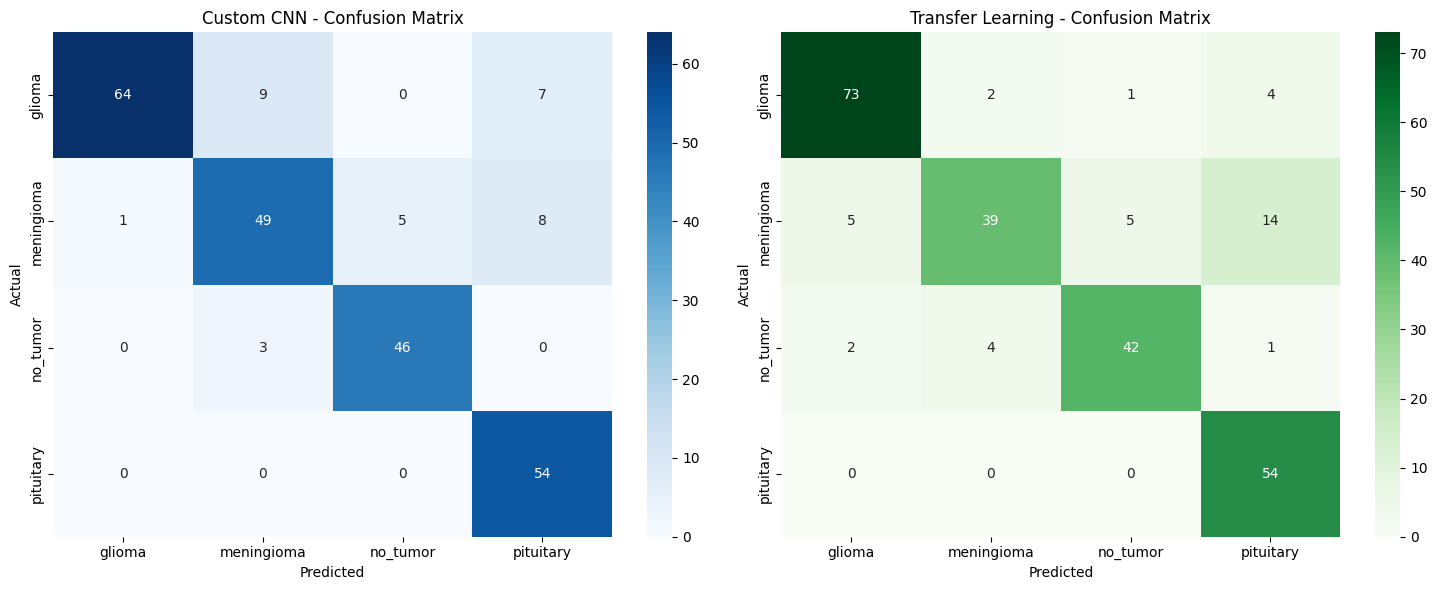

✅ Confusion matrices plotted!


In [19]:
print("📊 PLOTTING CONFUSION MATRICES...")

# Create subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Custom CNN Confusion Matrix
cm_custom = confusion_matrix(y_true, y_pred_custom_classes)
sns.heatmap(cm_custom, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names, ax=ax1)
ax1.set_title('Custom CNN - Confusion Matrix')
ax1.set_xlabel('Predicted')
ax1.set_ylabel('Actual')

# Transfer Learning Confusion Matrix
cm_transfer = confusion_matrix(y_true, y_pred_transfer_classes)
sns.heatmap(cm_transfer, annot=True, fmt='d', cmap='Greens', xticklabels=class_names, yticklabels=class_names, ax=ax2)
ax2.set_title('Transfer Learning - Confusion Matrix')
ax2.set_xlabel('Predicted')
ax2.set_ylabel('Actual')

plt.tight_layout()
plt.show()

print("✅ Confusion matrices plotted!")

📈 PLOTTING TRAINING HISTORY...


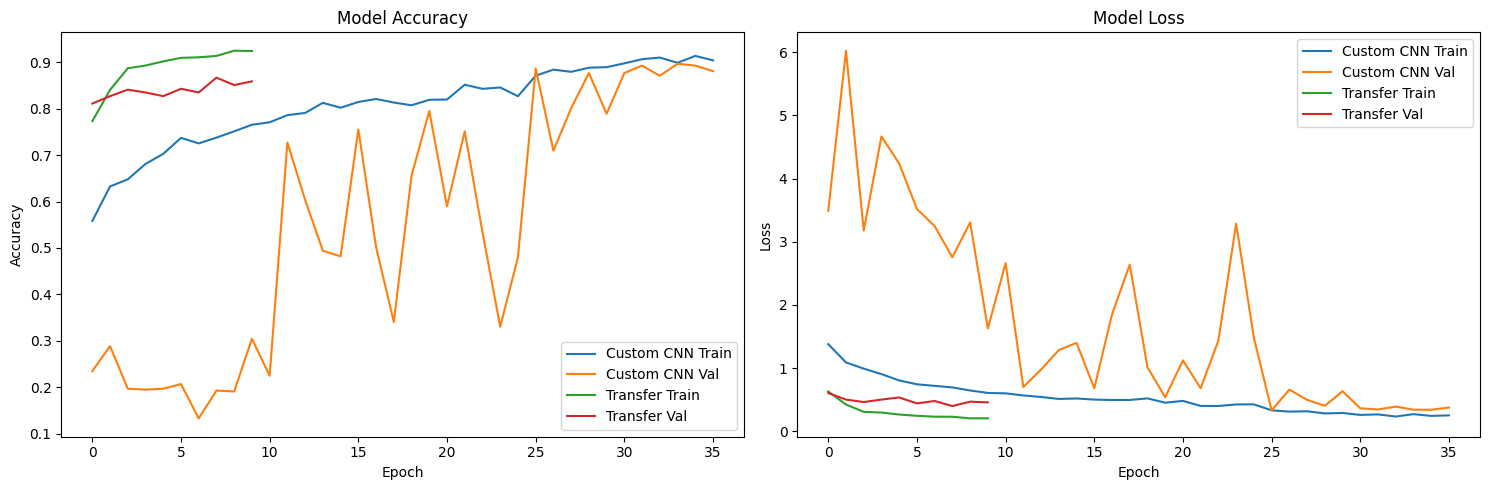

✅ Training history plotted!


In [20]:
print("📈 PLOTTING TRAINING HISTORY...")

# Plot accuracy history
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Accuracy plot
ax1.plot(history_custom.history['accuracy'], label='Custom CNN Train')
ax1.plot(history_custom.history['val_accuracy'], label='Custom CNN Val')
ax1.plot(history_transfer.history['accuracy'], label='Transfer Train')
ax1.plot(history_transfer.history['val_accuracy'], label='Transfer Val')
ax1.set_title('Model Accuracy')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Accuracy')
ax1.legend()

# Loss plot
ax2.plot(history_custom.history['loss'], label='Custom CNN Train')
ax2.plot(history_custom.history['val_loss'], label='Custom CNN Val')
ax2.plot(history_transfer.history['loss'], label='Transfer Train')
ax2.plot(history_transfer.history['val_loss'], label='Transfer Val')
ax2.set_title('Model Loss')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Loss')
ax2.legend()

plt.tight_layout()
plt.show()

print("✅ Training history plotted!")

In [21]:
print("🏆 COMPREHENSIVE MODEL COMPARISON")
print("="*50)

# Calculate additional metrics
from sklearn.metrics import precision_score, recall_score, f1_score

# Custom CNN metrics
custom_precision = precision_score(y_true, y_pred_custom_classes, average='weighted')
custom_recall = recall_score(y_true, y_pred_custom_classes, average='weighted')
custom_f1 = f1_score(y_true, y_pred_custom_classes, average='weighted')

# Transfer Learning metrics
transfer_precision = precision_score(y_true, y_pred_transfer_classes, average='weighted')
transfer_recall = recall_score(y_true, y_pred_transfer_classes, average='weighted')
transfer_f1 = f1_score(y_true, y_pred_transfer_classes, average='weighted')

# Create comparison table
comparison_data = {
    'Metric': ['Test Accuracy', 'Test Loss', 'Precision', 'Recall', 'F1-Score'],
    'Custom CNN': [f"{custom_accuracy:.4f}", f"{custom_loss:.4f}", 
                   f"{custom_precision:.4f}", f"{custom_recall:.4f}", f"{custom_f1:.4f}"],
    'Transfer Learning': [f"{transfer_accuracy:.4f}", f"{transfer_loss:.4f}", 
                         f"{transfer_precision:.4f}", f"{transfer_recall:.4f}", f"{transfer_f1:.4f}"]
}

comparison_df = pd.DataFrame(comparison_data)
print("📊 PERFORMANCE COMPARISON:")
print(comparison_df)

# Determine best model
print("\n🎯 BEST MODEL SELECTION:")
if custom_accuracy > transfer_accuracy:
    best_model = custom_model
    best_model_name = "Custom CNN"
    best_accuracy = custom_accuracy
    print(f"🏆 WINNER: {best_model_name} with {best_accuracy:.4f} accuracy")
else:
    best_model = transfer_model
    best_model_name = "Transfer Learning"
    best_accuracy = transfer_accuracy
    print(f"🏆 WINNER: {best_model_name} with {best_accuracy:.4f} accuracy")

# Save the best model for deployment
best_model.save('best_brain_tumor_model.h5')
print(f"💾 Best model saved as 'best_brain_tumor_model.h5'")

🏆 COMPREHENSIVE MODEL COMPARISON
📊 PERFORMANCE COMPARISON:
          Metric Custom CNN Transfer Learning
0  Test Accuracy     0.8659            0.8455
1      Test Loss     0.3616            0.4430
2      Precision     0.8774            0.8554
3         Recall     0.8659            0.8455
4       F1-Score     0.8655            0.8409

🎯 BEST MODEL SELECTION:
🏆 WINNER: Custom CNN with 0.8659 accuracy
💾 Best model saved as 'best_brain_tumor_model.h5'
